In [1]:
import os
import pandas as pd
import numpy as np
from numpy import array
from matplotlib import pyplot as plt
#读取arousal数据
data = pd.read_csv('test2.csv')

In [2]:
data

,va1,arousal,articulation,bri,har_com,harmony,loud,pitch,rhythm,tem
0,4.280,-1.754,2.202,2.644,-4.720,5.246,-2.416,3.964,-5.382,-1.742
1,4.714,-1.266,1.338,2.730,-4.592,5.370,-2.278,4.242,-5.606,-1.642
2,5.246,-0.784,1.562,2.736,-4.510,5.738,-2.642,4.880,-5.608,-1.594
3,5.610,-0.580,0.802,2.572,-4.188,5.548,-3.244,4.866,-5.798,-1.820
4,5.610,-0.512,-0.906,2.230,-4.360,5.276,-3.434,4.086,-6.422,-2.228
...,...,...,...,...,...,...,...,...,...,...
266,NaN,-2.528,NaN,-0.580,-5.906,3.266,NaN,2.482,-7.672,-3.970
267,NaN,-2.962,NaN,-0.334,-6.516,3.718,NaN,2.444,-7.794,-4.354
268,NaN,-3.100,NaN,-0.524,-6.990,4.190,NaN,2.430,-8.088,-4.770
269,NaN,-3.500,NaN,-0.574,-7.424,4.344,NaN,2.294,-8.226,-5.224


In [3]:
def calculate_error(st, seq_range):
    x = np.arange(seq_range[0], seq_range[1] + 1)
    y = np.array(st[seq_range[0]:seq_range[1] + 1])
    A = np.ones((len(x), 2), float)
    A[:, 0] = x
    # 返回回归系数、残差平方和、自变量X的秩、X的奇异值
    (p, residuals, ranks, s) = np.linalg.lstsq(A, y, rcond=None)#最小二乘法回归
    try:
        error = residuals[0]
    except IndexError:
        error = 0.0
    return error

def improvement_splitting_here(T, i, seq_range):
    return calculate_error(T, (seq_range[0], i)) + calculate_error(T, (i + 1, seq_range[1]))


def Top_Down(T, max_error, seq_range=None):
    if not seq_range:
        seq_range = (0, len(T) - 1)
    best_so_far = float('inf')
    break_point = float('inf')
    for i in range(seq_range[0] + 1, seq_range[1]):
        improvement_in_approximation = improvement_splitting_here(T, i, seq_range)
        if improvement_in_approximation < best_so_far:
            break_point = i
            best_so_far = improvement_in_approximation
    left_error = calculate_error(T, (seq_range[0], break_point))
    left_seg = T[seq_range[0]:break_point + 1]
    right_error = calculate_error(T, (break_point+1, seq_range[1]))
    right_seg = T[break_point+1:seq_range[1]+1]
    if left_error > max_error:
        segleft = Top_Down(T, max_error, (seq_range[0], break_point))
    else:
        segleft = [left_seg]
    if right_error > max_error:
        segright = Top_Down(T, max_error, (break_point, seq_range[1]))
    else:
        segright = [right_seg]
    return segleft + segright

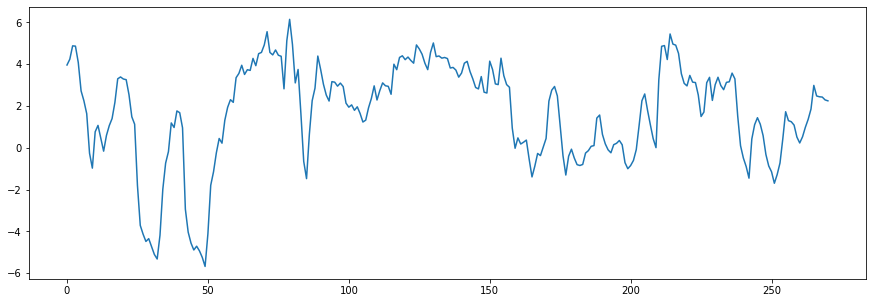

In [15]:
plt.figure(figsize=(15,5))
plt.plot(data['pitch'].dropna())
plt.savefig('pitch.jpg')
plt.show()

[ 7  2  5  4  6  3  6  2  6  3  5  2  7  1  1  2 21  4  2  8  1  2 26 11
  5  2 11  2  1  2 13  1  2  9  4 11  4  5  1  1 13 13  1  2 12]
[ 9  6  9  3  6  2  6  3  5  2  7  1  1 23  4  3  8  2 26 11 18  2  1  2
 13  1  2 10 18  5  1  1 13 13  1  2 12]
[ 9  6  9  3  6  2  6  3  5  2  7  1  1 23  4  3  8 28 12 19  1  3 13  2
 10 18  5  1  1 13 13  2 13]
[10 14  3  6  2  6  3  5  2  7  1  1 23  4  3  8 28 12 19  1  3 13  2 10
 18  5  1  2 25  2 13]


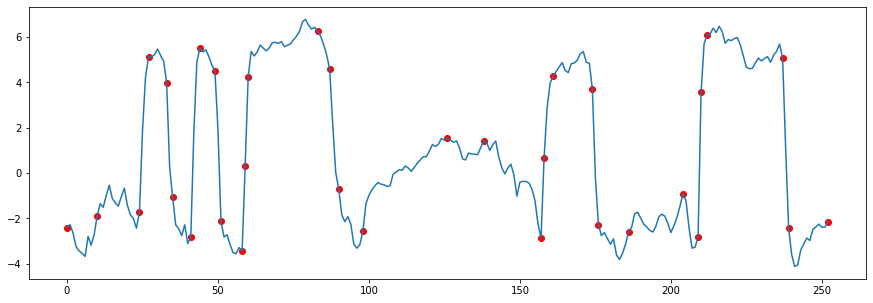

In [4]:
from scipy import stats
mode = [] #存储众数
number = []#存储众数出现的次数
feature=data['loud'].dropna()
for d in range(1,5):
    data_split = Top_Down(feature, d)
    x = []#x存储分界点的index
    y = []
    for i in range(0,len(data_split)):
        x.append(data_split[i].index[0])
    x.append(len(feature)-1)#记得再加上最后一个点的index
    xd = np.diff(x)
    print(xd)
    xdm = stats.mode(xd)
    mode.append(xdm[0][0])
    number.append(xdm[1][0]/len(xd))
for i in x:
    y.append(feature[(feature.index==i)])
y=np.array(y)
plt.figure(figsize=(15,5))
plt.plot(feature.index,feature)
plt.scatter(x,y,color="r")
plt.savefig('new.jpg')
plt.show()

In [5]:
for index, row in data.iteritems():
    mode = [] #存储众数
    number_of_segment = []#存储总的分段数
    number_of_mode = []#存储众数出现的次数 
    percent = []#存储众数出现次数的占总段数的比值
    feature_name = []#特征名称
    threshold = []
    feature = row.dropna()#去除空值
    for d in range(10,105,5):
        d = d/10
        data_split = Top_Down(feature, d)
        x = []#x存储分界点的index
        for i in range(0,len(data_split)):
            x.append(data_split[i].index[0])
        x.append(len(feature)-1)#记得再加上最后一个点的index
        xd = np.diff(x)
        xdm = stats.mode(xd)
        mode.append(xdm[0][0])
        number_of_segment.append(len(xd))
        number_of_mode.append(xdm[1][0])
        percent.append(xdm[1][0]/len(xd))
        feature_name.append(index)
        threshold.append(d)

    if index == 'va1':
        save_file=pd.DataFrame({'feature_name':feature_name,'threshold':threshold,'mode':mode,'number_of_segment':number_of_segment,'number_of_mode':number_of_mode,'percent':percent})
        save_file.to_csv('result.csv',index=False)
    else:
        save_file=pd.DataFrame({'feature_name':feature_name,'threshold':threshold,'mode':mode,'number_of_segment':number_of_segment,'number_of_mode':number_of_mode,'percent':percent})
        save_file.to_csv('result.csv',header=False,index=False,mode='a')   

In [6]:
a=np.array([1,2,3,4,5,6,7])
a.reshape(-1,2)

ValueError: cannot reshape array of size 7 into shape (2)

In [ ]:
for index, columns in data.iteritems():
    col = np.array(columns)
    col=col.reshape(-1,4)#
    mean = col.mean(axis=1)